<a href="https://colab.research.google.com/github/ro1238b/CODSOFT/blob/main/Credit_card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Dependencies**

In [160]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from imblearn.over_sampling import SMOTE
import warnings
warnings.filterwarnings('ignore')

In [161]:
#Load the data set
credit_f =pd.read_csv('/content/sample_data/creditcard.csv')

In [162]:
#Display the first few rows of the data set
credit_f.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [163]:
#Display the last few rows of the data set
credit_f.tail()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
281162,169976.0,1.982862,-0.191857,-1.288356,0.242522,0.211868,-0.374508,0.070290,-0.082566,0.300299,...,-0.184553,-0.466302,0.300574,0.719913,-0.229497,0.223967,-0.082091,-0.063403,21.39,0.0
281163,169976.0,-1.307438,-0.436296,1.382657,0.321161,0.526295,0.085972,0.668555,0.259204,-0.281912,...,0.041594,-0.465836,0.463291,-0.586186,-0.153310,-0.974211,0.069566,0.164605,196.74,0.0
281164,169976.0,-0.118356,0.999900,-0.489499,-1.194648,1.370202,-1.152867,1.633383,-0.369153,-0.888770,...,0.278934,0.845246,-0.448409,-0.345288,0.117910,0.169825,0.087010,0.139218,0.77,0.0
281165,169979.0,-1.058675,1.748133,-0.757358,-0.367130,0.555888,-1.274261,0.903275,-0.184630,0.331954,...,0.300303,1.098596,-0.152620,-0.150452,-0.408381,-0.205347,-0.231437,0.069091,2.64,0.0
281166,169979.0,-0.162987,1.348668,1.278697,4.398252,1.191563,2.071459,0.434193,0.424164,-1.950008,...,0.255804,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [164]:
#Display the shape of the Dataset
credit_f.shape


(281167, 31)

In [165]:
#Display the information of Dataset
credit_f.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281167 entries, 0 to 281166
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    281167 non-null  float64
 1   V1      281167 non-null  float64
 2   V2      281167 non-null  float64
 3   V3      281167 non-null  float64
 4   V4      281167 non-null  float64
 5   V5      281167 non-null  float64
 6   V6      281167 non-null  float64
 7   V7      281167 non-null  float64
 8   V8      281167 non-null  float64
 9   V9      281167 non-null  float64
 10  V10     281167 non-null  float64
 11  V11     281167 non-null  float64
 12  V12     281167 non-null  float64
 13  V13     281167 non-null  float64
 14  V14     281167 non-null  float64
 15  V15     281167 non-null  float64
 16  V16     281167 non-null  float64
 17  V17     281167 non-null  float64
 18  V18     281167 non-null  float64
 19  V19     281167 non-null  float64
 20  V20     281167 non-null  float64
 21  V21     28

In [166]:
credit_f.isnull().sum() #Check number of missing values

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       1
V24       1
V25       1
V26       1
V27       1
V28       1
Amount    1
Class     1
dtype: int64

In [167]:
credit_f.dropna(inplace=True) #Drop all the missing values

In [168]:
credit_f.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [169]:
class_count=credit_f['Class'].value_counts()
print(class_count) # Distribute the legal transactions and Fraud Transactions

Class
0.0    280675
1.0       491
Name: count, dtype: int64


In [170]:
Legal_t =credit_f[credit_f['Class']==0] # Legal is denote by 0
fraud_t =credit_f[credit_f['Class']==1] # Illegal is denote by 1

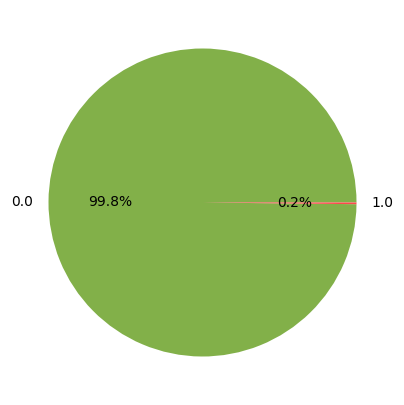

In [171]:
#create a pie chart for visualization
custom_palette=['#82B049','#FF474C']
plt.figure(figsize=(5,5))
#  use index of class_count for labels
plt.pie(class_count, labels=class_count.index, autopct='%1.1f%%', colors=custom_palette)
plt.show()

In [172]:
Legal_t.Amount.describe() # Display all the stat about Legal transaction

count    280675.000000
mean         88.577648
std         250.183633
min           0.000000
25%           5.740000
50%          22.080000
75%          77.650000
max       25691.160000
Name: Amount, dtype: float64

In [173]:
fraud_t.Amount.describe() # Display all the stat about Fraud transaction

count     491.000000
mean      122.373605
std       256.919810
min         0.000000
25%         1.000000
50%         9.210000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [174]:
Legal_t_sample=Legal_t.sample(n=491) #randomly taking 4 values from legal transactions

In [175]:
#Merge the 491 rows of legal transactions and fraud transactions
new_dataset=pd.concat([Legal_t_sample,fraud_t],axis=0)

In [176]:
#New class Distribution
new_dataset['Class'].value_counts()

Class
0.0    491
1.0    491
Name: count, dtype: int64

In [177]:
#Target and Features
sm=SMOTE(random_state=14) #aplly SMOTE for class imbalance
X=new_dataset.drop(columns='Class',axis=1) #Features data
Y=new_dataset['Class'] #Target Data
X_res, Y_res = sm.fit_resample(X, Y) #Resample the dataset


In [178]:
X.shape

(982, 30)

In [179]:
Y.shape

(982,)

In [180]:
#Spliting the data into target data and testing data
X_train,X_test,Y_train,Y_test=train_test_split(X_res,Y_res,test_size=0.2,stratify=Y,random_state=14)

In [181]:
# Feature scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) #scale traning features
X_test = scaler.transform(X_test)#scale target features

In [182]:
#Train a LogisticRegression Model
Model=LogisticRegression()
Model.fit(X_train,Y_train)

LogisticRegression()

**Evaluate the Model**

In [183]:
#Training data Prediction
X_train_prediction=Model.predict(X_train)
accuracy_score_result = accuracy_score(X_train_prediction,Y_train) # Change variable name
print(accuracy_score_result * 100)


94.39490445859873


In [184]:
#Testing data Prediction
X_test_prediction=Model.predict(X_test)
accuracy_score_result2 = accuracy_score(X_test_prediction,Y_test) # Change variable name
print(accuracy_score_result2 * 100)

98.47715736040608


In [185]:
#Confusion_matrix
X_test_prediction=Model.predict(X_test)
print(confusion_matrix(Y_test,X_test_prediction))

[[97  1]
 [ 2 97]]


In [186]:
#Classification Report
X_test_prediction=Model.predict(X_test)
print(classification_report(Y_test,X_test_prediction))

              precision    recall  f1-score   support

         0.0       0.98      0.99      0.98        98
         1.0       0.99      0.98      0.98        99

    accuracy                           0.98       197
   macro avg       0.98      0.98      0.98       197
weighted avg       0.98      0.98      0.98       197



In [187]:
#Train a RandomForestClassifier Model
clf=RandomForestClassifier()
clf.fit(X_train,Y_train)

RandomForestClassifier()

**Evaluate the Model**

In [188]:
#Training data Prediction
Y_pred1=clf.predict(X_train)
print(metrics.accuracy_score(Y_train,Y_pred1) * 100)

100.0


In [189]:
#Testing data Prediction
Y_pred=clf.predict(X_test)
print(metrics.accuracy_score(Y_test,Y_pred) * 100)

97.46192893401016


In [191]:
Y_pred=clf.predict(X_test)
print(confusion_matrix(Y_test,Y_pred))

[[97  1]
 [ 4 95]]


In [192]:
Y_pred=clf.predict(X_test)
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97        98
         1.0       0.99      0.96      0.97        99

    accuracy                           0.97       197
   macro avg       0.97      0.97      0.97       197
weighted avg       0.98      0.97      0.97       197

